In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pyyaml==5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 28.7 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=52f5176fa52414c50240cd631a8e3ae96ae13af0fca3d02cdf8967b1b1830e66
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 16 kB/s 
     |████████████████████████████████| 12.8 MB 30.0 MB/s 
     |████████████████████████████████| 7.6 MB 28.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.11.0+cu113
    Uninstalling torchaudio-0.11.0+cu113:
      Successfully uninstalled torchaudio-0.11.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

In [4]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.7.1+cu101
True


In [5]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.1 MB 663 kB/s 
     |████████████████████████████████| 79 kB 7.4 MB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
     |████████████████████████████████| 130 kB 47.0 MB/s 
     |████████████████████████████████| 151 kB 58.4 MB/s 
     |████████████████████████████████| 843 kB 58.3 MB/s 
     |████████████████████████████████| 117 kB 77.3 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=b0409949b7641c788952665b31fc980cc2a0ffe57ab006b77c451b2060c32c53
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=77a07b62f41c7d4c517

In [6]:
import detectron2
from detectron2.utils.logger import setup_logger

setup_logger()

from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer

import os
import pickle

from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from detectron2.config import get_cfg

from detectron2 import model_zoo

from detectron2.utils.visualizer import ColorMode

from google.colab.patches import cv2_imshow
import random
import cv2
import matplotlib.pyplot as plt

def plot_samples(dataset_name, n=1):
    dataset_custom = DatasetCatalog.get(dataset_name)
    dataset_custom_metadata = MetadataCatalog.get(dataset_name)
    
    for s in random.sample(dataset_custom, n):
        img = cv2.imread(s["file_name"])
        v = Visualizer(img[:,:,::-1], metadata = dataset_custom_metadata, scale =0.5)
        v = v.draw_dataset_dict(s)
        plt.figure(figsize=(15,20))
        plt.imshow(v.get_image())
        plt.show()

def get_train_cfg(config_file_path, checkpoint_url, train_dataset_name, test_dataset_name, num_class, device, output_dir):
    cfg = get_cfg()
    
    cfg.merge_from_file(model_zoo.get_config_file(config_file_path))
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
    cfg.DATASETS.TRAIN = (train_dataset_name,)
    cfg.DATASETS.TEST = (test_dataset_name,)
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.0001
    cfg.SOLVER.MAX_ITER = 10000
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
    cfg.SOLVER.STEPS = []
    
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_class

    cfg.MODEL.DEVICE = device
    cfg.OUTPUT_DIR = output_dir

    return cfg


In [11]:
!unzip /content/drive/MyDrive/detectron2_custom_dataset.zip

Archive:  /content/drive/MyDrive/detectron2_custom_dataset.zip
  inflating: detectron2_custom_dataset/image_downloader.py  
  inflating: detectron2_custom_dataset/labelme2coco.py  
  inflating: detectron2_custom_dataset/test.json  
   creating: detectron2_custom_dataset/test/
  inflating: detectron2_custom_dataset/test/fruit apple banana orange_65.jpeg  
  inflating: detectron2_custom_dataset/test/fruit apple banana orange_65.json  
  inflating: detectron2_custom_dataset/test/fruit apple banana orange_88.jpeg  
  inflating: detectron2_custom_dataset/test/fruit apple banana orange_88.json  
  inflating: detectron2_custom_dataset/test/fruit apple banana orange_91.jpeg  
  inflating: detectron2_custom_dataset/test/fruit apple banana orange_91.json  
  inflating: detectron2_custom_dataset/test/fruit apple banana orange_95.jpeg  
  inflating: detectron2_custom_dataset/test/fruit apple banana orange_95.json  
  inflating: detectron2_custom_dataset/train.json  
   creating: detectron2_custom_

In [12]:
from detectron2.utils.logger import setup_logger

setup_logger()

from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer

import os
import pickle 

config_file_path = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
checkpoint_url = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"

output_dir = "/content/drive/MyDrive/YapayZekaProje2/output-3"
num_class = 3

device = "cuda"

train_dataset_name = "Fruit_train2"
train_images_path = "/content/detectron2_custom_dataset/train"
train_json_annot_path = "/content/detectron2_custom_dataset/train.json"

test_dataset_name = "Fruit_test2"
test_images_path = "/content/detectron2_custom_dataset/test"
test_json_annot_path = "/content/detectron2_custom_dataset/test.json"

cfg_save_path = "IS_cfg.pickle"

register_coco_instances(name = train_dataset_name, metadata ={},
                        json_file = train_json_annot_path, image_root = train_images_path)

register_coco_instances(name = test_dataset_name, metadata ={},
                        json_file = test_json_annot_path, image_root = test_images_path)


def main():
    cfg = get_train_cfg(config_file_path, checkpoint_url, train_dataset_name, test_dataset_name, num_class, device, output_dir)

    with open(cfg_save_path, "wb") as f:
        pickle.dump(cfg,f,protocol = pickle.HIGHEST_PROTOCOL)
    
    os.makedirs(cfg.OUTPUT_DIR,exist_ok = True)
    trainer = DefaultTrainer(cfg)
    trainer.resume_or_load(resume=False)
    trainer.train()


if __name__ == "__main__":
    main()
    
    
    



[06/19 14:18:29 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:04, 37.3MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (12, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (12,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to

[06/19 14:18:39 d2.engine.train_loop]: Starting training from iteration 0
[06/19 14:18:48 d2.utils.events]:  eta: 1:08:45  iter: 19  total_loss: 2.999  loss_cls: 1.339  loss_box_reg: 0.9322  loss_mask: 0.6906  loss_rpn_cls: 0.0102  loss_rpn_loc: 0.02048  time: 0.4399  data_time: 0.0446  lr: 1.9981e-06  max_mem: 2721M
[06/19 14:18:56 d2.utils.events]:  eta: 1:09:56  iter: 39  total_loss: 2.999  loss_cls: 1.314  loss_box_reg: 0.9693  loss_mask: 0.6882  loss_rpn_cls: 0.008165  loss_rpn_loc: 0.01572  time: 0.4298  data_time: 0.0092  lr: 3.9961e-06  max_mem: 2744M
[06/19 14:19:06 d2.utils.events]:  eta: 1:10:36  iter: 59  total_loss: 2.854  loss_cls: 1.226  loss_box_reg: 0.9274  loss_mask: 0.6801  loss_rpn_cls: 0.005896  loss_rpn_loc: 0.01781  time: 0.4454  data_time: 0.0256  lr: 5.9941e-06  max_mem: 2932M
[06/19 14:19:15 d2.utils.events]:  eta: 1:11:06  iter: 79  total_loss: 2.77  loss_cls: 1.124  loss_box_reg: 0.9304  loss_mask: 0.67  loss_rpn_cls: 0.005725  loss_rpn_loc: 0.01763  time: 0

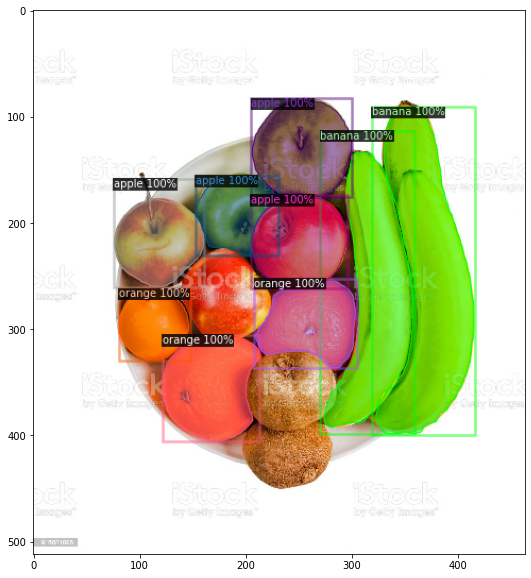

In [13]:
from detectron2.engine import DefaultPredictor

import os
import pickle

cfg_save_path = "/content/IS_cfg.pickle"

with open(cfg_save_path,"rb") as f:
    cfg = pickle.load(f)
    
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "/content/drive/MyDrive/YapayZekaProje2/output-3/model_0009999.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

predictor = DefaultPredictor(cfg)

image_path = "/content/drive/MyDrive/istockphoto-916824896-1024x1024.jpg"

def on_image(image_path,predictor):
    im = cv2.imread(image_path)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TEST[0]), scale=0.5, instance_mode = ColorMode.SEGMENTATION)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize=(14,10))
    plt.imshow(v.get_image())
    plt.show()

on_image(image_path, predictor)